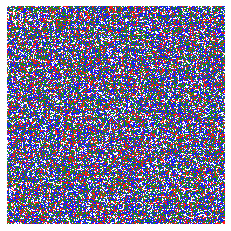

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# define the constants:
   
delta_c=1/3
delta_s_0=1/4
delta_r=10/32
tau=3/4
N = 250
#lat = np.empty((N, N), dtype=int) # declare the 250 x 250 square lattice.

 # fill the lattice with some initial conditions obeying LOCAL interactions (i.e. in clumps).
#for i in range(N):
    #for j in range(N):
    
       # if i<100 and j<170:
         #   lat[i, j] = 0
       
       # elif 100<i<210 and 100<j<250:
            # lat[i, j] = 1
       # else:
            # lat[i,j] =2
lat = np.random.choice(np.arange(0, 4), size=(N,N))

 # plot the initial lattice with C= red, R= green, S= blue.
my_colors = ['red', 'green', 'blue', 'white'] # 0 => red, 1 => green, 2 => blue, 3 => white (empty lattice).
cmap = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))
plt.imshow(lat, cmap=cmap, vmin=0, vmax=len(my_colors) - 1, alpha=0.9)
plt.axis('off')
plt.show()

In [2]:
# we need to count the 8 neighbors for a given lattice point.
count_red=0
count_blue=0
count_green=0

for k in range (0,1000):
    for i in range(1,N-1):
        # restart the counting.
        count_red=0
        count_blue=0
        count_green=0
        for j in range(1,N-1):
            # restart the counting.
            count_red=0
            count_blue=0
            count_green=0
            count=8

            # we count the neighboring lattice points types (red, green or blue).
            if lat[i-1,j-1]==0:
                count_red+=1
            if lat[i+1,j+1]==0:
                count_red+=1
            if lat[i,j+1]==0:
                count_red+=1
            if lat[i,j-1]==0:
                count_red+=1
            if lat[i+1,j-1]==0:
                count_red+=1
            if lat[i-1,j+1]==0:
                count_red+=1  
            if lat[i+1,j]==0:
                count_red+=1
            if lat[i-1,j]==0:
                count_red+=1
            if lat[i-1,j-1]==1:
                count_green+=1
            if lat[i+1,j+1]==1:
                count_green+=1
            if lat[i,j+1]==1:
                count_green+=1
            if lat[i,j-1]==1:
                count_green+=1
            if lat[i+1,j-1]==1:
                count_green+=1
            if lat[i-1,j+1]==1:
                count_green+=1  
            if lat[i+1,j]==1:
                count_green+=1
            if lat[i-1,j]==1:
                count_green+=1
            if lat[i-1,j-1]==2:
                count_blue+=1
            if lat[i+1,j+1]==2:
                count_blue+=1
            if lat[i,j+1]==2:
                count_blue+=1
            if lat[i,j-1]==2:
                count_blue+=1
            if lat[i+1,j-1]==2:
                count_blue+=1
            if lat[i-1,j+1]==2:
                count_blue+=1  
            if lat[i+1,j]==2:
                count_blue+=1
            if lat[i-1,j]==2:
                count_blue+=1

              # we add them up to obtain the total number of neighboring lattice points (i.e. 8).
            # count=count_red+count_blue+count_green
            #print(count) # we can print it to keep track of it.

            #if count!= 0: # if count is zero somehow (i.e. a lattice is surrounded by empty cells), we exclude it.

                # we define and use the given probabilities with np.random.choice.

                # here, note that if a cell is killed with a specific probability, it gets empty and needs to be refilled.
            if lat[i,j]==0:
                 x=np.random.choice([0,3],p=[1-delta_c, delta_c] )

            if lat[i,j]==1:
                 x=np.random.choice([1,3],p=[1-delta_r, delta_r] )

            if lat[i,j]==2:
                 x=np.random.choice([2,3],p=[1-delta_s_0-tau*(count_red/count),delta_s_0+tau*(count_red/count)] )

            if lat[i,j]==3:
                x=np.random.choice(np.arange(0, 4), p=[count_red/count,count_green/count, count_blue/count, 1-count_red/count-count_green/count-count_blue/count])
                
            lat[i,j]=x
            #else:
                #continue

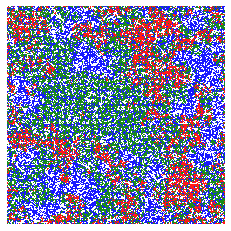

In [3]:
# We update and plot the simulation for 3200 epochs.
plt.imshow(lat, cmap=cmap, vmin=0, vmax=len(my_colors) - 1, alpha=0.9)
plt.axis('off')
plt.show()